# Student Performance

Jade Chen, Prabhjot Singh, Brianna Zhou, Tamara Nammao

![Student Performance](https://github.com/jadeeechen/stat-301_student-performance-mathematics_winter-2023/blob/main/studentperformance.jpg?raw=true)
<br>Source: Youtube - Ma. Israelle S. Lopez

## Introduction

The dataset chosen attest to student performance. The data is taken from two Portuguese secondary schools and collected through school reports and questionnaires. For our project, we are only using the dataset on “Mathematics”.

In terms of predicting a students final grade (`G3`) we propose the question: Can family background, lifestyle, and study habits predict a student's final grade in Mathematics? We've grouped variables into the categories of family backgrond, lifestyle and student habits with more information on each in the research question section below.

Our dataset had numerous categorical variables with multiple levels, so our approach involved converting these variables into binary variables with 2 levels. This binary transformation facilitated the use of the LASSO tool, allowing us to identify the most crucial variables by shrinking less impactful ones down to zero. While LASSO can pose challenges for categorical variables, treating them as binary variables, as demonstrated in the study by Grill et al. (2012), enables effective utilization of LASSO.

Moreover, LASSO's has to capability for accurate prediction as to manage dimensional datasets, pinpoint significant features, and prevent overfitting by reducing less influential coefficients to zero. This is highlighted in the research by Muthukrishnan and Rohini (2016). This regularization technique not only enhances predictive accuracy but also promotes model simplicity and interpretability making it easier for the reader.

**Datset Source**: https://archive.ics.uci.edu/dataset/320/student+performance

### Research Question


<span style="color:red"> Can family background, school background, lifestyle, and study habits predict a student's final grade in Mathematics?</span>

- **Response**
    - `G3` (Final Grade)
    - *Note: We are treating the response as continuous.* 

- **Explanatory**
    - Family Background:
        - `internet` (Internet Access at Home)
        - `traveltime` (Home to School Travel Time)
    - School Background
        - `school` (Student's School)
        - `schoolsup` (Extra Educational Support)
        - `absences` (Number of School Absences)
        - `failures` (Number of Past Class Failures)
        - `higher` (Wants to Take Higher Education)
    - Lifestyle:
        - `goout` (Going Out)
        - `romantic` (With a Romantic Relationship)
        - `dalc` and `walc` (Alchohol Consumption)
    - Study Habits
        - `studytime` (Weekly Study Time)

## Methods and Results

#### Importing Packages

In [1]:
library(tidyverse)
library(GGally)
library(patchwork)
library(corrplot)
library(gridExtra)
library(forcats)
library(glmnet)
library(rsample)
library(mltools)

options(warn=-1)  # -1 suppresses all warnings

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8


Attaching package: ‘mltools’


The following object is masked from ‘package:tidyr’:

    replace_na



#### Read Data
Read in data from the web, split by delimiter `;`.

In [ ]:
url = 'https://raw.githubusercontent.com/jadeeechen/stat-301_student-performance-mathematics_winter-2023/main/student-mat.csv'
data <- read.csv(url, sep = ";")
head(data,3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10


#### Drop Features

Since we are only interested in the final grade `G3`, we shall drop the first and second period grades `G1` and `G2`.

As noted in the dataset source:
> Important Note: The target attribute `G3` has a strong correlation with attributes `G2` and `G1`. This occurs because `G3` is the final year grade (issued at the 3rd period), while `G1` and `G2` correspond to the 1st and 2nd period grades. It is more difficult to predict `G3` without `G1` and `G2`, but such prediction is much more useful (see paper source for more details).

In [3]:
data <- data |>
    select(-G1, -G2)

#### Data Wrangling
The relevant features were converted to numeric/factor type according to the "Additional Variable Information" from the dataset source.

In [4]:
#Binary -> Factor Type
data$school <- as.factor(data$school)
data$sex <- as.factor(data$sex)
data$address <- as.factor(data$address)
data$famsize <- as.factor(data$famsize)
data$Pstatus <- as.factor(data$Pstatus)
data$schoolsup <- as.factor(data$schoolsup)
data$famsup <- as.factor(data$famsup)
data$paid <- as.factor(data$paid)
data$activities <- as.factor(data$activities)
data$nursery <- as.factor(data$nursery)
data$higher <- as.factor(data$higher)
data$internet <- as.factor(data$internet)
data$romantic <- as.factor(data$romantic)

#Nominal -> Factor Type
data$Mjob <- as.factor(data$Mjob)
data$Fjob <- as.factor(data$Fjob)
data$reason <- as.factor(data$reason)
data$guardian <- as.factor(data$guardian)

#Numeric -> Numeric Type
data$age <- as.numeric(data$age)
data$Medu <- as.numeric(data$Medu)
data$Fedu <- as.numeric(data$Fedu)
data$traveltime <- as.numeric(data$traveltime)
data$studytime <- as.numeric(data$studytime)
data$failures <- as.numeric(data$failures)
data$famrel <- as.numeric(data$famrel)
data$freetime <- as.numeric(data$freetime)
data$goout <- as.numeric(data$goout)
data$Dalc <- as.numeric(data$Dalc)
data$Walc <- as.numeric(data$Walc)
data$health <- as.numeric(data$health)
data$absences <- as.numeric(data$absences)
data$G3 <- as.numeric(data$G3)

#### Feature Details
We have the detailed description for possible values of each 33 features.

1. `school`: Gabriel Pereira (GP) or Mousinho da Silveira (MS)
2. `sex`: Female (F) or Male (M)
3. `age`: 15 to 22 years
4. `address`: Urban (U) or Rural (R)
5. `famsize`: ≤3 (LE3) or >3 (GT3)
6. `pstatus`: Cohabitation - Together (T) or Apart (A)
7. `medu`: Mother's Education (0-4)
8. `fedu`: Father's Education (0-4)
9. `mjob`: Mother's Job
10. `fjob`: Father's Job
11. `reason`: Reason for School Choice
12. `guardian`: Guardian - Mother, Father, or Other
13. `traveltime`: Travel Time to School (1-4)
14. `studytime`: Weekly Study Time (1-4)
15. `failures`: Past Failures (1-3 or 4)
16. `schoolsup`: Extra Educational Support - Yes or No
17. `famsup`: Family Educational Support - Yes or No
18. `paid`: Extra Paid Classes - Yes or No
19. `activities`: Extra-Curricular Activities - Yes or No
20. `nursery`: Attended Nursery School - Yes or No
21. `higher`: Wants Higher Education - Yes or No
22. `internet`: Internet Access at Home - Yes or No
23. `romantic`: Romantic Relationship - Yes or No
24. `famrel`: Family Relationships Quality (1-5)
25. `freetime`: Free Time After School (1-5)
26. `goout`: Going Out with Friends (1-5)
27. `dalc`: Workday Alcohol Consumption (1-5)
28. `walc`: Weekend Alcohol Consumption (1-5)
29. `health`: Current Health Status (1-5)
30. `absences`: Number of School Absences (0-93)
31. `g1`: First Period Grade (0-20)
32. `g2`: Second Period Grade (0-20)
33. `g3`: Final Grade (0-20)

###  Exploratory Data Analysis

#### Summary Statistics for Numerical Data Analysis

In [5]:
numeric_vars <- c("age", "Medu", "Fedu", "traveltime", "studytime", "failures", 
                  "famrel", "freetime", "goout", "Dalc", "Walc", "health", 
                  "absences", "G3")

categorical_vars <- c("school", "sex", "address", "famsize", "Pstatus", 
                      "Mjob", "Fjob", "reason", "guardian", "schoolsup", 
                      "famsup", "paid", "activities", "nursery", "higher", 
                      "internet", "romantic")

In [6]:
summary_stats <- summary(data[numeric_vars])
print(summary_stats)

      age            Medu            Fedu         traveltime      studytime    
 Min.   :15.0   Min.   :0.000   Min.   :0.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:16.0   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :17.0   Median :3.000   Median :2.000   Median :1.000   Median :2.000  
 Mean   :16.7   Mean   :2.749   Mean   :2.522   Mean   :1.448   Mean   :2.035  
 3rd Qu.:18.0   3rd Qu.:4.000   3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :22.0   Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
    failures          famrel         freetime         goout      
 Min.   :0.0000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:4.000   1st Qu.:3.000   1st Qu.:2.000  
 Median :0.0000   Median :4.000   Median :3.000   Median :3.000  
 Mean   :0.3342   Mean   :3.944   Mean   :3.235   Mean   :3.109  
 3rd Qu.:0.0000   3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :3.0000   Max.   :5.000   Max.   :5.

Table 1

#### Frequency Table for Categorical Data Analysis

In [7]:
for(var in categorical_vars) {
  freq_table <- table(data[[var]])
  print(paste("Frequency table for", var))
  print(freq_table)
}

[1] "Frequency table for school"

 GP  MS 
349  46 
[1] "Frequency table for sex"

  F   M 
208 187 
[1] "Frequency table for address"

  R   U 
 88 307 
[1] "Frequency table for famsize"

GT3 LE3 
281 114 
[1] "Frequency table for Pstatus"

  A   T 
 41 354 
[1] "Frequency table for Mjob"

 at_home   health    other services  teacher 
      59       34      141      103       58 
[1] "Frequency table for Fjob"

 at_home   health    other services  teacher 
      20       18      217      111       29 
[1] "Frequency table for reason"

    course       home      other reputation 
       145        109         36        105 
[1] "Frequency table for guardian"

father mother  other 
    90    273     32 
[1] "Frequency table for schoolsup"

 no yes 
344  51 
[1] "Frequency table for famsup"

 no yes 
153 242 
[1] "Frequency table for paid"

 no yes 
214 181 
[1] "Frequency table for activities"

 no yes 
194 201 
[1] "Frequency table for nursery"

 no yes 
 81 314 
[1] "Frequency table f

Table 2

#### Box Plot

Examine the relationship between internet access `internet` and final grade `G3`.

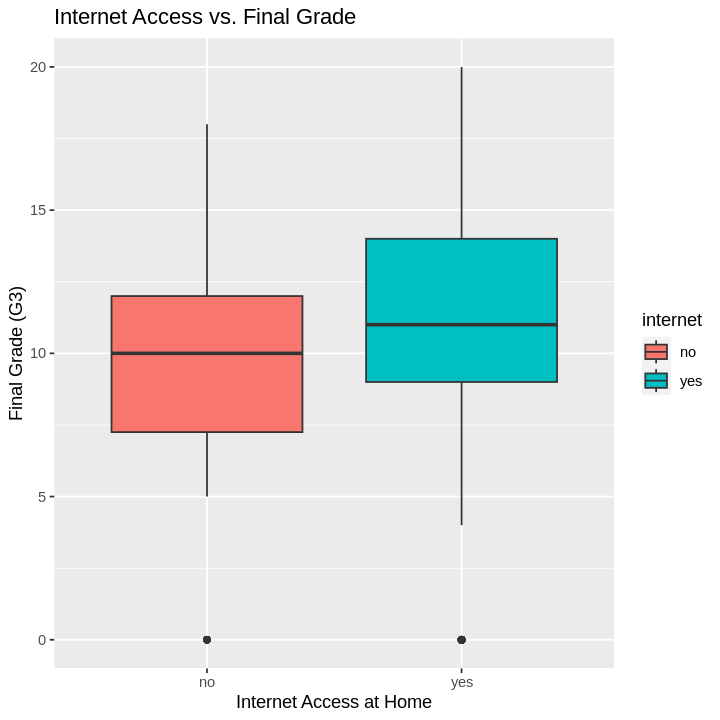

In [8]:
options(repr.plot.width=6, repr.plot.height=6)
box_internet <- ggplot(data, aes(x = internet, y = G3, fill = internet)) +
    geom_boxplot() +
    labs(x = "Internet Access at Home", y = "Final Grade (G3)") +
    ggtitle("Internet Access vs. Final Grade")
box_internet

Figure 1

#### Faceted Bar Chart

Next, we shall use faceted bar charts to examine the distribution of our numeric response variable `G3` (using the average), and how it varies across **factor** and **numeric** variables in order to identify trends, patterns, and differences in the data.

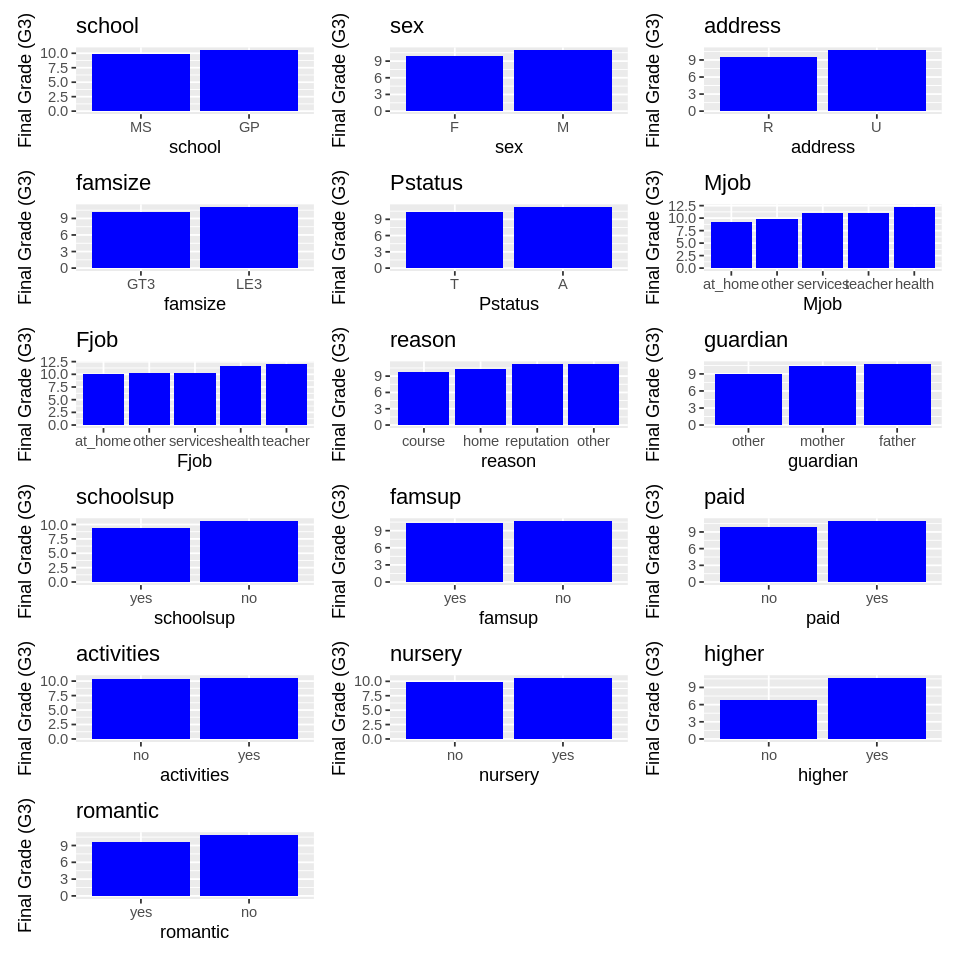

In [9]:
options(repr.plot.width=8, repr.plot.height=8)

############## FACTOR ############## 

#Remove Internet because already explored
data_factor <- data |>
    select_if(is.factor) |>
    select(-internet)

# Define the variable names for faceting
facet_vars_factor <- colnames(data_factor)

# Create a list of ggplot objects for each facet
facetbar_factor <- lapply(facet_vars_factor, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE)) |>
        arrange(desc(avg_G3)) |>
        mutate(!!var := reorder(.data[[var]], avg_G3)) #  Re-arrange the factor levels so that they are ordered by the values of avg_G3
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_factor <- wrap_plots(facetbar_factor, ncol = 3)
plot_facetbar_factor

Figure 2

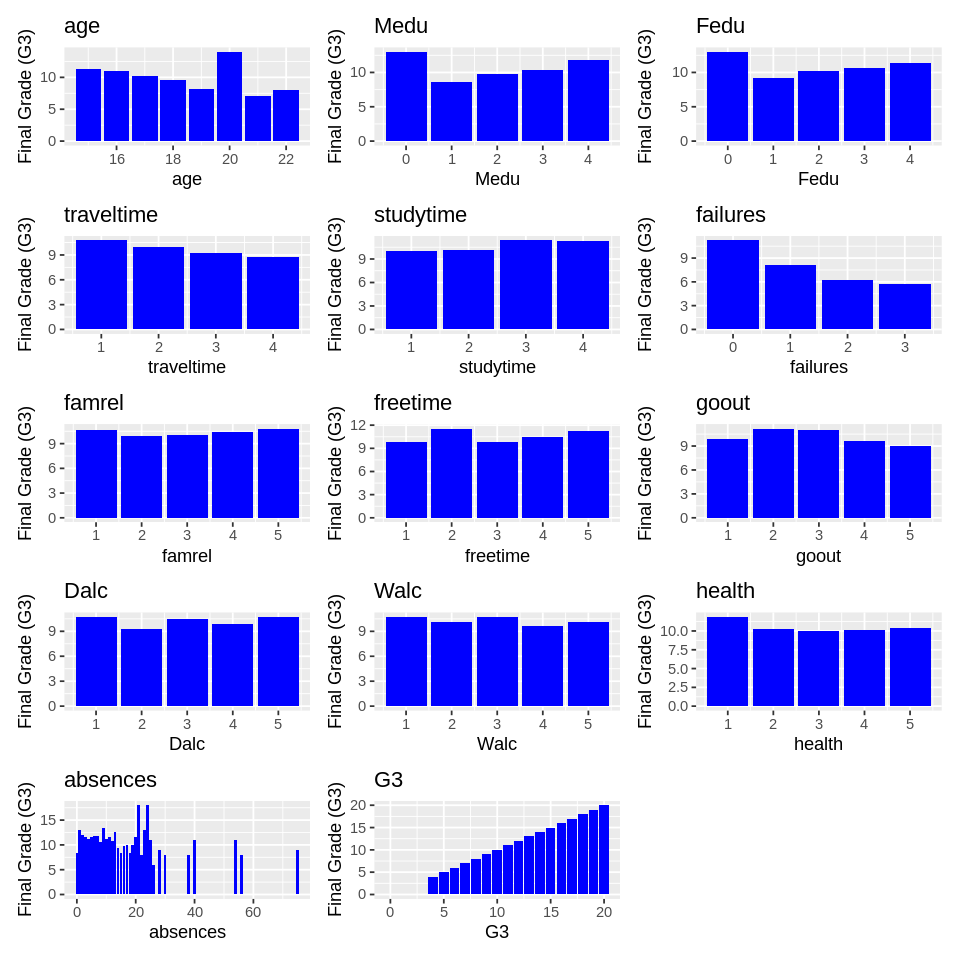

In [10]:
############## NUMERIC ############## 

options(repr.plot.width=8, repr.plot.height=8)

data_numeric <- data |>
    select_if(is.numeric)

# Define the variable names for faceting
facet_vars_numeric <- colnames(data_numeric)

# Create a list of ggplot objects for each facet
facetbar_numeric <- lapply(facet_vars_numeric, function(var) {
    average_data <- data |>
        group_by(.data[[var]]) |>
        summarize(avg_G3 = mean(G3, na.rm = TRUE))
    
    ggplot(average_data, aes(x = .data[[var]], y = avg_G3)) +
    geom_bar(stat = "identity", fill = "blue") +
    labs(x = var, y = "Final Grade (G3)") +
    ggtitle(var)
})

# Combine the plots
plot_facetbar_numeric <- wrap_plots(facetbar_numeric, ncol = 3)
plot_facetbar_numeric

Figure 3

#### Correlation Plot

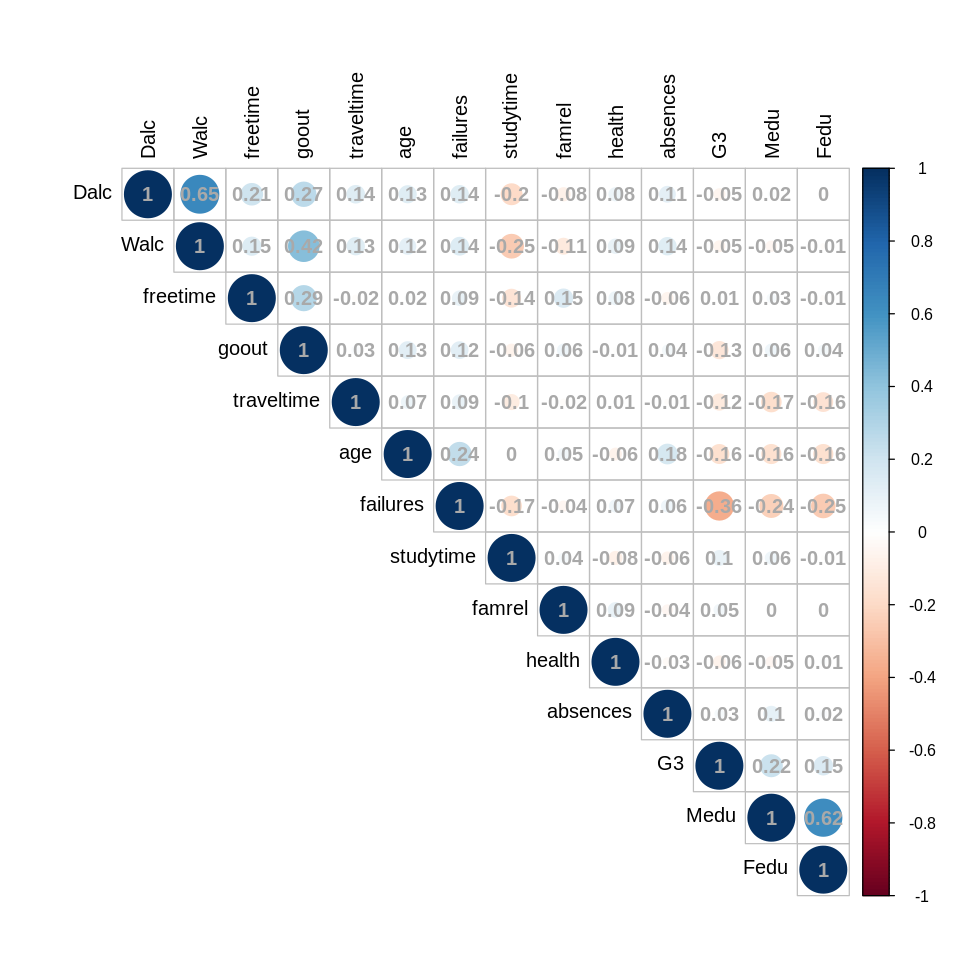

In [11]:
cor_matrix <- cor(data_numeric)

options(repr.plot.width=8, repr.plot.height=8)
corrplot(cor_matrix, method = "circle", type = "upper", order = "hclust", tl.col = "black", addCoef.col = "dark grey")


Figure 4

**Interpretation of EDA**

Summary statistics reveal demographic patterns, emphasizing Gabriel Pereira school dominance and urban residence prevalence. Family dynamics, parental education, and lifestyle factors such as study time are illuminated. Box plots show the positive impact of internet access on final grades but emphasize variability. Faceted bar charts dissect performance across factors like parental occupations and extracurricular engagement. The correlation plot highlights significant factors affecting grades, with failures showing a strong negative correlation and study time a modest positive correlation. Addressing multicollinearity is crucial for robust regression modeling. This EDA lays a foundation for understanding the complex web of factors influencing academic achievements.

#### Visualizations

After we've used multiple visualizations to perform EDA, we conclude that the following visualizations are most relevent to address the research question.

##### Visualization 1

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

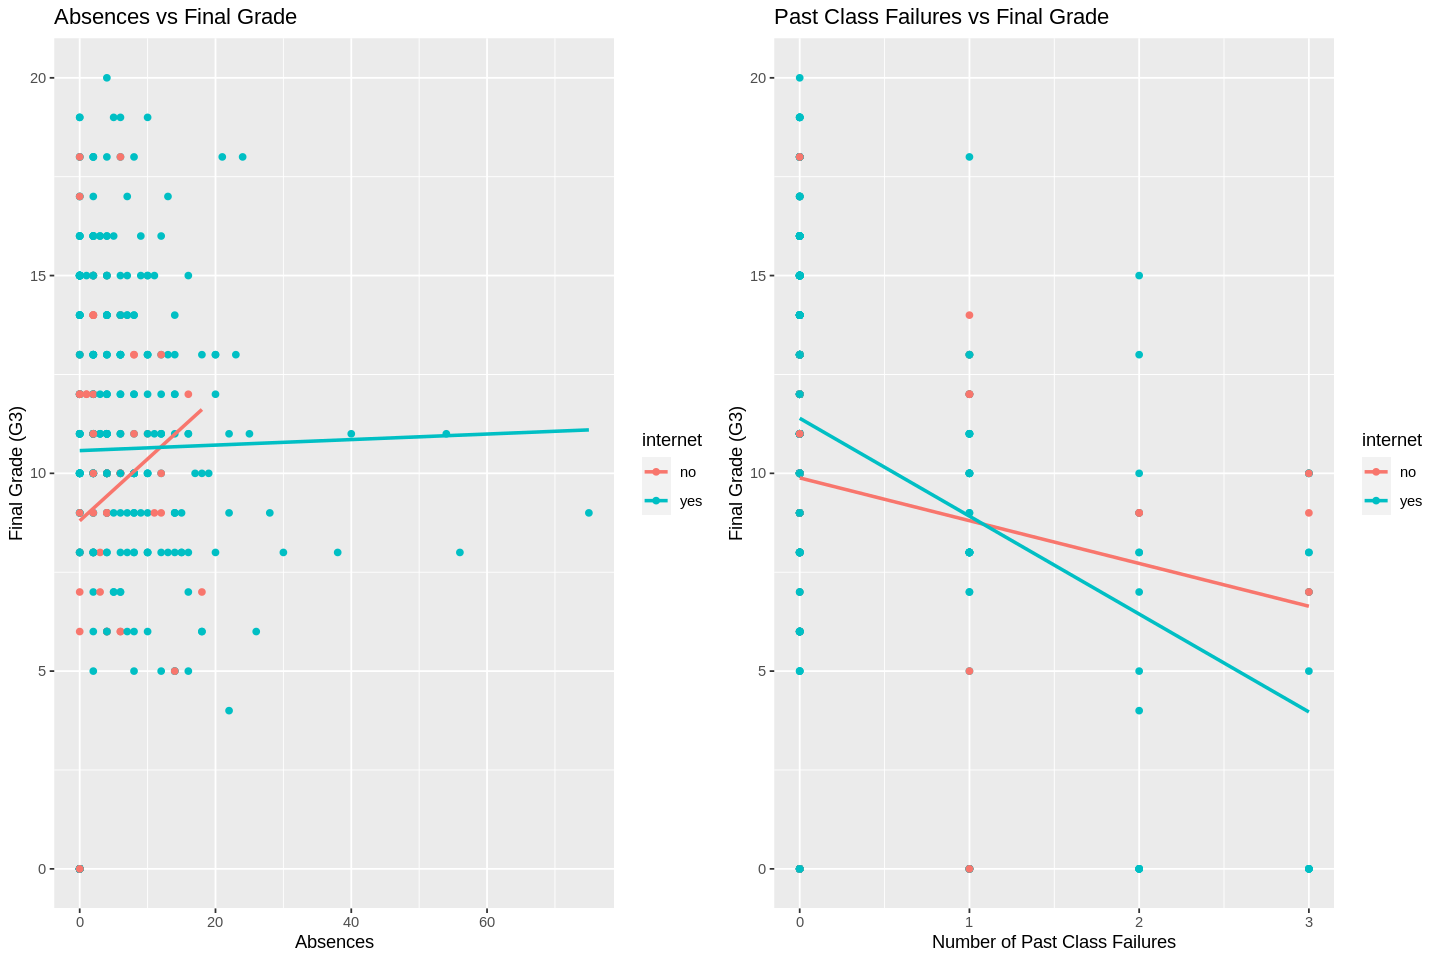

In [12]:
options(repr.plot.width=12, repr.plot.height=8)
scatter_absences_combined <- ggplot(data, aes(x = absences, y = G3, color = internet)) +
  geom_point() +
  labs(x = "Absences", y = "Final Grade (G3)", 
       title = "Absences vs Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

scatter_failures_combined <- ggplot(data, aes(x = failures, y = G3, color = internet)) +
  geom_point() +
  labs(x = "Number of Past Class Failures", y = "Final Grade (G3)", 
       title = "Past Class Failures vs Final Grade") +
  geom_smooth(method = "lm", se = FALSE)

combined_plot <- grid.arrange(scatter_absences_combined, scatter_failures_combined, ncol = 2)

combined_plot

Figure 5

##### Visualization 2

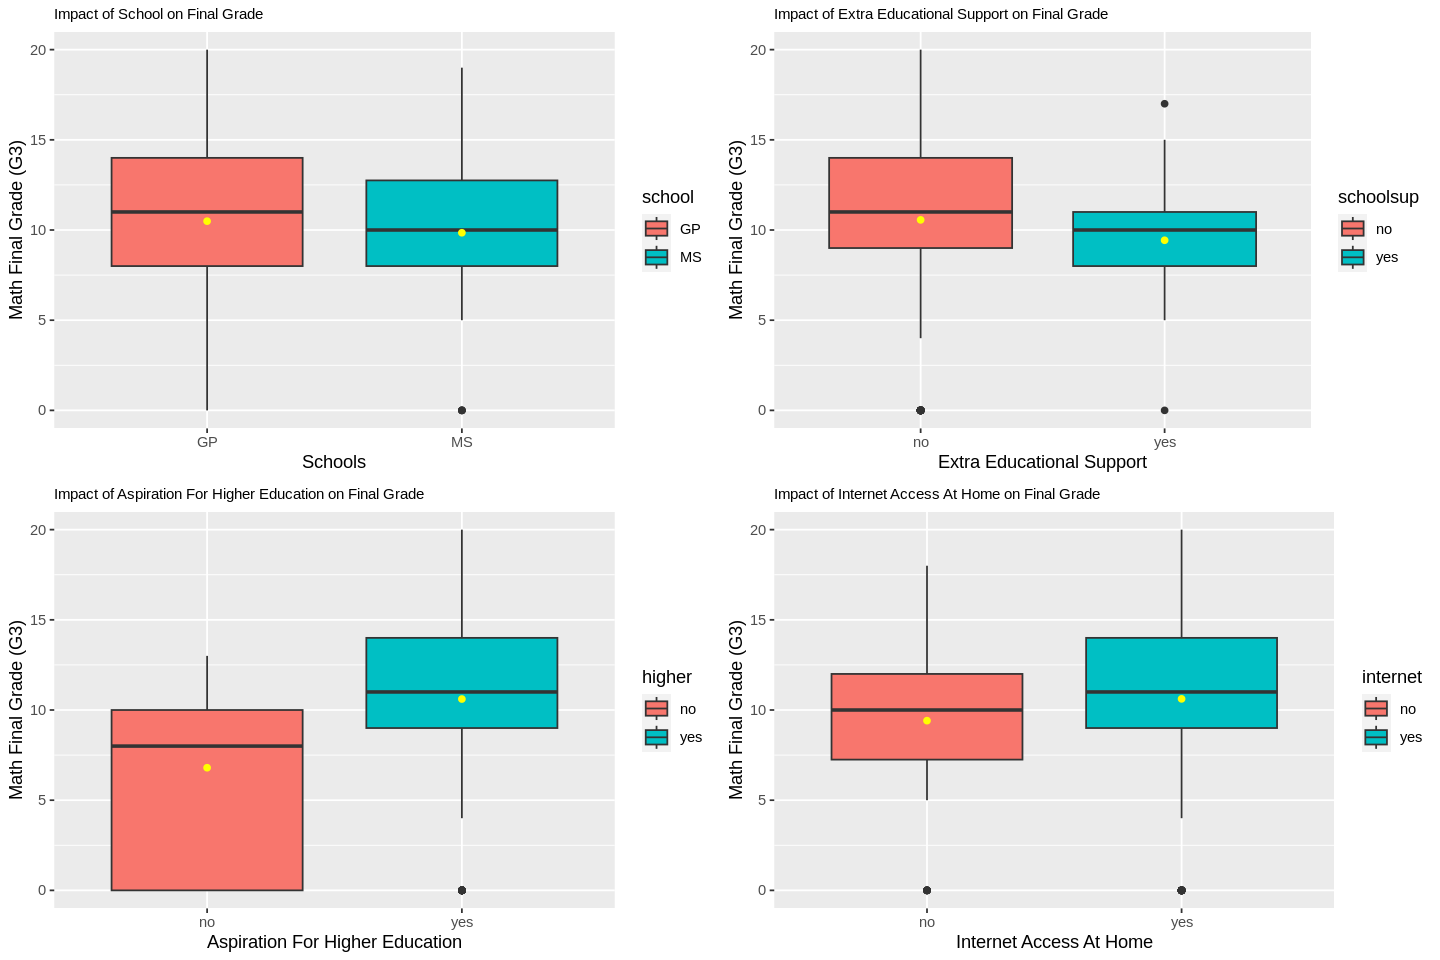

In [13]:
# Create a boxplot of math grades based on the school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
mat_boxplot_school <- data |>
        ggplot(aes(x = school, y = G3, fill = school)) +
        geom_boxplot() +
        stat_summary(fun=mean, geom='point',color="yellow", fill="yellow") +
        labs(x = "Schools", y = "Math Final Grade (G3)", 
        title = "Impact of School on Final Grade") +
        theme(plot.title = element_text(size = 9))

# Create a boxplot of math grades based on extra educational support 
mat_boxplot_schoolsup <- data |>
        ggplot(aes(x = schoolsup, y = G3, fill = schoolsup)) +
        geom_boxplot() +
        stat_summary(fun=mean, geom='point', color="yellow", fill="yellow") +
        labs(x = "Extra Educational Support", y = "Math Final Grade (G3)", 
        title = "Impact of Extra Educational Support on Final Grade")+
        theme(plot.title = element_text(size = 9))

# Create a boxplot of math grades based on aspiration to take higher education 
mat_boxplot_higher <- data |>
        ggplot(aes(x = higher, y = G3, fill = higher)) +
        geom_boxplot() +
        stat_summary(fun=mean, geom='point', color="yellow", fill="yellow") +
        labs(x = "Aspiration For Higher Education", y = "Math Final Grade (G3)", 
        title = "Impact of Aspiration For Higher Education on Final Grade") +
        theme(plot.title = element_text(size = 9))

# Create a boxplot of math grades based on Internet access at home
mat_boxplot_internet <- data |>
        ggplot(aes(x = internet, y = G3, fill = internet)) +
        geom_boxplot() +
        stat_summary(fun=mean, geom='point', color="yellow", fill="yellow") +
        labs(x = "Internet Access At Home", y = "Math Final Grade (G3)", 
        title = "Impact of Internet Access At Home on Final Grade") +
        theme(plot.title = element_text(size = 9))

combine_plot1 <- grid.arrange(mat_boxplot_school , mat_boxplot_schoolsup, mat_boxplot_higher, 
                              mat_boxplot_internet, ncol = 2)

Figure 6

##### Visualization 3

[1] 0.03570681


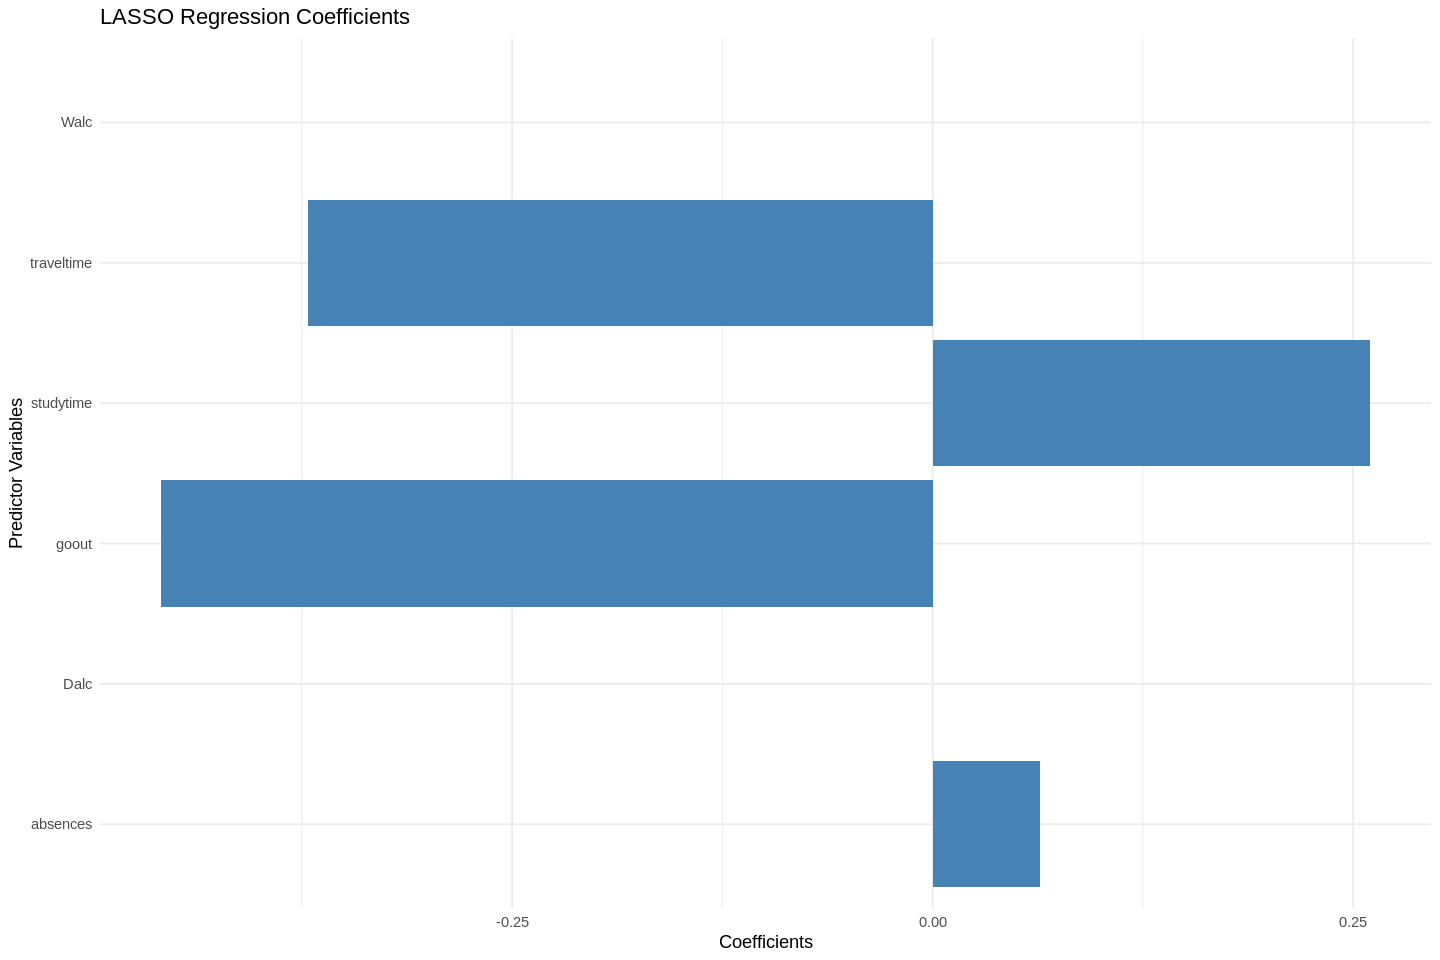

In [14]:
explanatory_vars <- c("studytime", "traveltime", "goout", "Dalc", "Walc", "absences")
response_var <- "G3"

data_for_model <- data[, c(explanatory_vars, response_var)]

# Create model matrix for LASSO regression
x <- model.matrix(G3 ~ ., data_for_model)[, -1] 
y <- data$G3

# Scale the explanatory variables
x_scaled <- scale(x)


set.seed(123) 

cv_lasso <- cv.glmnet(x_scaled, y, alpha = 1)  # alpha=1 for LASSO

# Extract the best lambda value
best_lambda <- cv_lasso$lambda.min

# Fit the LASSO model with the best lambda value
lasso_model <- glmnet(x_scaled, y, alpha = 1, lambda = best_lambda)

# Extract coefficients from the LASSO model
lasso_coef <- coef(lasso_model, s = best_lambda)

# Predict values using the LASSO model
predicted_values <- predict(lasso_model, s = best_lambda, newx = x_scaled)

# Calculate R-squared value
r_squared <- 1 - sum((y - predicted_values)^2) / sum((y - mean(y))^2)

# Print R-squared value
print(r_squared)

# Convert the LASSO coefficients to a dataframe for plotting
coef_df <- data.frame(
  Variable = rownames(lasso_coef),
  Coefficient = lasso_coef[, 1]
)

# Remove the intercept row for plotting
coef_df <- coef_df[-1, ]

# Visualization
ggplot(coef_df, aes(x = Variable, y = Coefficient)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +  # Flips the axes for easier reading
  theme_minimal() +
  labs(title = "LASSO Regression Coefficients",
       x = "Predictor Variables",
       y = "Coefficients")

Figure 7

### Method: Lasso Regularization

#### Reason

1. **High-Dimensional Data:** Our datset includes a large amount of variables which can lead to a high-dimensional feature space. Lasso can perform variable selection by shrinking some coefficients to zero.

2. **Interpretability:** We are interested in determining which factors (among family background, number of failures, and number of absences) are significant predictors of a student's final grade. Lasso's feature selection can help identify the most relevant variables.
   
3. **Preventing Overfitting:** Lasso introduces a penalty term that helps prevent overfitting by regularizing the model.

4. **Dealing with Correlated Predictors:** As seen in the EDA, there is the presence of multicollinearity. Lasso can handle multicollinearity issues by automatically selecting one variable over the others. Thus, we no longer need to use variance inflation factors (VIF) because we can rely on Lasso's inherent feature selection capabilities.

#### Assumptions

1. **Linearity:** LASSO assumes a linear relationship between predictors and the response variable, which can be seen in our EDA.

2. **Handling Categorical Variables:** Effective application of Lasso requires addressing factor variables with more than three levels, as Lasso's feature selection may lead to issues related to the omitted category.
   - **Solution:** Employ domain knowledge to merge different factor levels to transform them into binary factors, creating only 1 dummy variable. After feature selection, revert the factors to their original levels if Lasso deems them highly important before applying `lm`.

#### Implementation

***1. Feature Engineering***

Dichotomization: Merge categorical featurs with 3+ levels so they become binary factors.
1. `MJob`: Merge `at_home` into `other` and `health`/`teacher` into `services`.
2. `FJob`: Merge `at_home` into `other` and `health`/`teacher` into `services`.
3. `Reason`: Merge `course` and `reputation` into `school_attribute`, and `home` into `other`.
3. `Guardian`: Merge `father` and `mother` into `parents`.

In [15]:
#  MJob and FJob: Merge at_home into other and health/teacher into services.
data$Mjob <- recode_factor(data$Mjob, at_home = "other", health = "services", teacher = "services")
data$Fjob <- recode_factor(data$Mjob, at_home = "other", health = "services", teacher = "services")

# Reason: Merge course and reputation into school_attribute, and home into other.
data$reason <- recode_factor(data$reason, course = "school attribute", reputation = "school attribute", home = "other")

# Guardian: Merge father and mother into parents.
data$guardian <- recode_factor(data$guardian, father = "parents", mother = "parents")

***2. Dummy Variables***

Create dummy variables for the categorical variables.

In [16]:
binary <- c("schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic")

for (column_name in binary) {
  data[[column_name]] <- as.numeric(data[[column_name]] == "yes")
}

In [17]:
factor_2_level <- c("school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian")

# Convert factor columns to numeric (1 for the first level, 2 for the second level)
for (column_name in factor_2_level) {
  levels <- levels(data[[column_name]])
  data[[column_name]] <- as.numeric(data[[column_name]] == levels[1]) + 1
}

***3. Variable Selection***

Use <span style="color:red">Lasso</span> regression for variable selection, find optimal value of $\lambda$ with cross-validation, and obtain optimal features for model.

In [18]:
set.seed(123)
data_split <- initial_split(data, prop = 0.6, strata = G3)
data_selection <- training(data_split)
data_prediction <- testing(data_split)

In [19]:
response_col_index <- which(names(data) == "G3")

X_train <- as.matrix(data_selection[, -response_col_index])
Y_train <- as.matrix(data_selection[, response_col_index])
X_test <- as.matrix(data_prediction[, -response_col_index])
Y_test <- as.matrix(data_prediction[, response_col_index])

lasso_model <- cv.glmnet(x = X_train |> as.matrix(), 
                         y = Y_train |> as.matrix(), 
                         alpha = 1)

In [20]:
beta_lasso <- coef(lasso_model, s = "lambda.min")

In [21]:
lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') |>
        filter(covariate != '(Intercept)' & abs(s1) !=0) |>
        pull(covariate)

***4. Model Building***

Utilize multiple linear regression `lm` with the variables selected by LASSO.

In [22]:
model <- lm(G3 ~ ., data = data_selection |> select(lasso_selected_covariates, G3))
model


Call:
lm(formula = G3 ~ ., data = select(data_selection, lasso_selected_covariates, 
    G3))

Coefficients:
(Intercept)          sex      address         Medu         Mjob     failures  
    11.6409      -0.6660      -0.9169       0.4513      -0.5298      -1.9090  
   internet     romantic       famrel       health  
     0.7916      -1.1859       0.5280      -0.3936  


***5. Evaluation & Results***

Evaluate the model's performance using $MSE$.

In [23]:
model_full <- lm(G3 ~ ., data = data_selection)
prediction_full <- predict(model_full, newdata = data_prediction)

R_MSE_models <- tibble(
  Model = "Full Model",
  R_MSE = rmse(
    preds = prediction_full,
    actuals = data_prediction$G3
  )
)


prediction <- predict(model, newdata = data_prediction)

R_MSE_models <- rbind(
    R_MSE_models,
    tibble(
        Model = "LASSO Model",
        R_MSE = rmse(
            preds = prediction,
            actuals = data_prediction$G3
        )
    )
)

R_MSE_models

Model,R_MSE
<chr>,<dbl>
Full Model,4.379071
LASSO Model,4.302861


Table 3

***6. Interpretation of Results***

**Data Splitting**: The dataset was splitting into two subsets: a training set and a testing set. Random sampling technique was used to ensure the split maintain the overall distribution of `G3` in both training and testing set. To ensure the reproducibility, a seed value was set before data splitting. The training set was used to train the LASSO regression model and the testing set was reserved for evaluating the model’s predictive performance. 

**Evaluation Metric**: The predictive performance of the LASSO regression model was assessed using the Mean Squared Error on the test set. The $MSE$ provides a measure of how well the model's predictions align with the actual final grades in the reserved testing data.


**Model Assessment**: We can see from the results above that the model we built using LASSO for variable selection has better prediction performance than just using a full model.

This was expected because Lasso Regression is a regularization method that adds a penalty term to the OLS (Ordinary Least Squares) regression and can shrink coefficients to 0, thus it can be used to simultaneously select and train a model.

It's designed to handle multicollinearity, prevent overfitting, and deal with a dataset with a large number of features.

The results suggests that Lasso regularization improves the model's generalization to new, unseen data.

#### Feature Selection

The feature selection process involved a combination of domain knowledge and Lasso Regression. Initially, all potential covariates were considered based on domain knowledge and their relevance to predicting final grades. Then, Lasso was used for variable selection by shrinking coefficients to 0, effectively select the most important predictors for predicting the final grade. Therefore, variables with non-zero coefficients in the LASSO model were selected for inclusion. 

#### Potential Limitations

Potential issues may arise with our analysis as we are using what was originally factor variables with LASSO. When we merge the levels together, we lose valuable information in the process. In addition, Lasso will now select/drop a variable with the overall information, and will not take into account the impact of different levels within that variable.

## Discussion

***Summary of Findings***

In our analysis, academic failures (`failures`) exhibited a strong negative correlation (coefficient: -1.9090) with the final grade (`G3`), indicating a substantial grade decrease for each additional failure. Maternal education (`Medu`) emerged as a positive predictor (coefficient: 0.4513), associating higher levels with an increased final grade. Internet access at home (`internet`) also proved significant (coefficient: 0.7916), emphasizing its positive impact on academic success. These insights highlight the nuanced interplay between home environment, parental influence, and student outcomes.

***Reflection on Expectations***

Results aligned with expectations regarding the influence of academic failures (`failures`). Quantification of parental education (`Medu` and `Fedu`) and internet access provided additional insights. Surprisingly, study habits (`studytime`) did not feature as prominently as other factors. LASSO regression improved predictive performance, aligning with expectations for handling multicollinearity and preventing overfitting.

***Model Improvement***

To refine the model, we would consider integrating variables capturing extracurricular activities and peer influence. Exploring interaction effects, particularly between parental education and study habits, could reveal synergies. Advanced modeling techniques and regularization methods may offer a more nuanced understanding, addressing potential bias in estimates. However, merging factor variable levels might lead to information loss, and LASSO's selection may not consider the impact of different levels within a variable.

***Future Research***

Findings pave the way for longitudinal research to track variable effects over a student's academic career. Exploring causality through structural equation modeling or causal inference techniques would provide deeper insights. Future research could investigate intervention strategies to mitigate adverse effects, offering a practical framework for educational improvement initiatives.

## References

R. Muthukrishnan and R. Rohini, "LASSO: A feature selection technique in predictive modeling for machine learning," 2016 IEEE International Conference on Advances in Computer Applications (ICACA), Coimbatore, India, 2016, pp. 18-20, doi: 10.1109/ICACA.2016.7887916.

Strobl, R., Grill, E., &amp; Mansmann, U. (2012, February 21). Graphical modeling of binary data using the Lasso: A simulation study - bmc medical research methodology. BioMed Central. https://doi.org/10.1186/1471-2288-12-16 
